### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [2]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

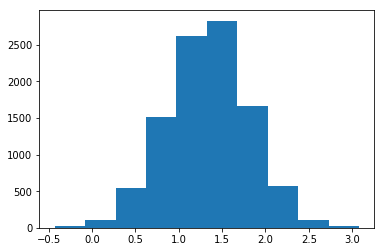

In [3]:
# difference in the average heights for coffee and non-coffee drinkers
diffs_coffee = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    mean_nocoff = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    diffs_coffee.append(mean_coff - mean_nocoff)

plt.hist(diffs_coffee);

In [4]:
np.percentile(diffs_coffee, 0.5), np.percentile(diffs_coffee, 99.5)

(0.10258900080919674, 2.5388333707966284)

**=> With 99% confidence interval, we have confidence that coffee drinkers are on average taller than non-coffee drinkers.**

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [5]:
sample_data.age.unique()

array(['<21', '>=21'], dtype=object)

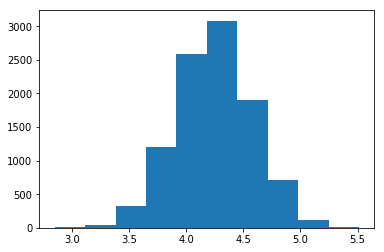

In [6]:
# difference in the average heights for those older than 21 and those younger than 21
diffs_age = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_older21 = bootsample[bootsample['age'] == '>=21']['height'].mean()
    mean_younger21 = bootsample[bootsample['age'] == '<21']['height'].mean()
    diffs_age.append(mean_older21 - mean_younger21)  

plt.hist(diffs_age);

In [7]:
np.percentile(diffs_age, 0.5), np.percentile(diffs_age, 99.5)

(3.3652749452554089, 5.0932450670660936)

**=> With 99% confidence interval, we have evidence that those older than 21 are on average taller than those younger than 21.**

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

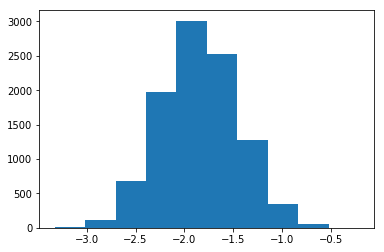

In [8]:
# difference in the avg height for coffee drinkers and the avg height for non-coffee drinkers for individuals under 21
diffs_coffee_under21 = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coffee_under21 = bootsample[(bootsample['drinks_coffee'] == True) & (bootsample['age'] == '<21')]['height'].mean()
    mean_nocoffee_under21 = bootsample[(bootsample['drinks_coffee'] == False) & (bootsample['age'] == '<21')]['height'].mean()
    diffs_coffee_under21.append(mean_coffee_under21 - mean_nocoffee_under21)
    
plt.hist(diffs_coffee_under21);

In [9]:
np.percentile(diffs_coffee_under21, 2.5), np.percentile(diffs_coffee_under21, 97.5)

(-2.5931557940679251, -1.0593651244624338)

**With 95% confidence interval, we have evidence that coffee drinkers under 21 are shorter than non-coffee drinkers under 21.**

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

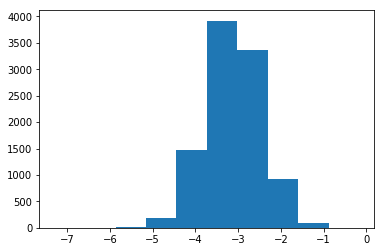

In [10]:
# difference in the avg height for coffee drinkers and the avg height for non-coffee drinkers for individuals over 21
diffs_coffee_over21 = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coffee_over21 = bootsample[(bootsample['drinks_coffee'] == True) & (bootsample['age'] == '>=21')]['height'].mean()
    mean_nocoffee_over21 = bootsample[(bootsample['drinks_coffee'] == False) & (bootsample['age'] == '>=21')]['height'].mean()
    diffs_coffee_over21.append(mean_coffee_over21 - mean_nocoffee_over21)
    
plt.hist(diffs_coffee_over21);

In [11]:
np.percentile(diffs_coffee_over21, 2.5), np.percentile(diffs_coffee_over21, 97.5)

(-4.4026329654774772, -1.8278953970884224)

**With 95% confidence interval, we have evidence that coffee drinkers over 21 are shorter than non-coffee drinkers over 21.**

Within the under 21 and over 21 groups, we saw that on average non-coffee drinkers were taller. But, when combined, we saw that on average coffee drinkers were on average taller. This is  **Simpson's paradox**, and essentially there are more adults in the dataset who were coffee drinkers. So these individuals made it seem like coffee drinkers were on average taller - which is a misleading result.This is the idea of **confounding variables altogether**. 